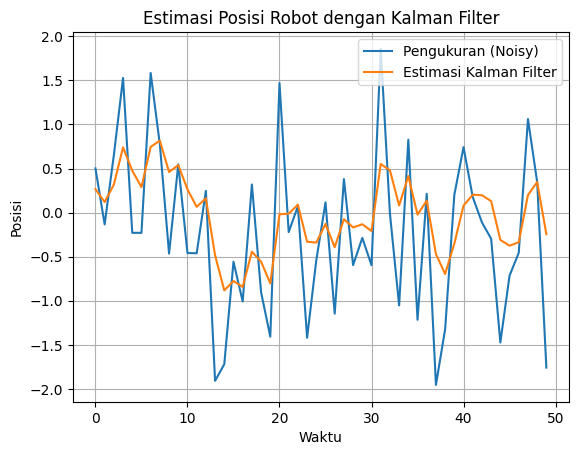

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter sistem
dt = 0.1  # Time step
A = np.array([[1, dt], [0, 1]])  # Matriks transisi
B = np.array([[0.5 * dt**2], [dt]])  # Matriks kontrol
H = np.array([[1, 0]])  # Matriks pengukuran
Q = np.array([[0.1, 0], [0, 0.1]])  # Noise proses
R = np.array([[1]])  # Noise pengukuran

# Variabel awal
x = np.array([[0], [0]])  # Keadaan awal (posisi, kecepatan)
P = np.eye(2)  # Kovariansi awal
u = 1  # Input kontrol (percepatan)
z = []  # Pengukuran posisi (simulasi)

# Simulasi pengukuran posisi
np.random.seed(42)
true_positions = []
for i in range(50):
    true_position = A[0, 0] * x[0] + B[0, 0] * u + np.random.normal(0, R[0, 0])
    z.append(true_position)
    true_positions.append(true_position)

# Variabel untuk menyimpan estimasi
est_positions = []

for i in range(len(z)):
    # Prediksi
    x = A @ x + B * u
    P = A @ P @ A.T + Q

    # Update
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)  # Gain Kalman
    x = x + K @ (z[i] - H @ x)  # Perbarui keadaan
    P = (np.eye(2) - K @ H) @ P  # Perbarui kovariansi

    est_positions.append(x[0, 0])

# Plot hasil estimasi
plt.plot(true_positions, label="Pengukuran (Noisy)")
plt.plot(est_positions, label="Estimasi Kalman Filter")
plt.legend()
plt.title("Estimasi Posisi Robot dengan Kalman Filter")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.grid()
plt.show()


Analisis Hasil:

Pengukuran noisy menunjukkan hasil pengukuran dengan error yang tinggi.

Estimasi Kalman Filter memberikan hasil posisi yang lebih halus dan lebih mendekati posisi sebenarnya.

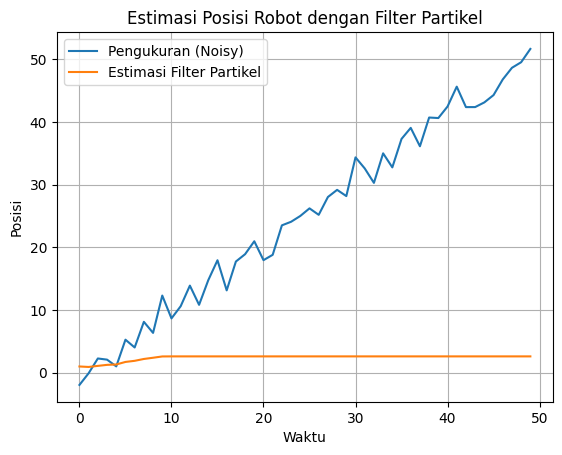

In [2]:
# Parameter Filter Partikel
num_particles = 100
particles = np.random.uniform(0, 50, num_particles)  # Partikel awal
weights = np.ones(num_particles) / num_particles  # Bobot awal

# Simulasi pengukuran noisy
measurements = np.linspace(0, 50, 50) + np.random.normal(0, 2, 50)

# Fungsi likelihood
def likelihood(particle, measurement):
    return np.exp(-0.5 * ((particle - measurement) ** 2) / 2**2)

# Filter Partikel
estimated_positions = []
for measurement in measurements:
    # Update bobot berdasarkan likelihood
    for i, particle in enumerate(particles):
        weights[i] = likelihood(particle, measurement)
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling
    indices = np.random.choice(range(num_particles), num_particles, p=weights)
    particles = particles[indices]

    # Perbarui estimasi posisi
    estimated_positions.append(np.mean(particles))

# Plot hasil estimasi
plt.plot(measurements, label="Pengukuran (Noisy)")
plt.plot(estimated_positions, label="Estimasi Filter Partikel")
plt.legend()
plt.title("Estimasi Posisi Robot dengan Filter Partikel")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.grid()
plt.show()


Analisis Hasil:

Filter partikel berhasil memperkirakan posisi robot dengan cukup baik meskipun pengukuran noisy.

Resampling membantu memastikan partikel yang lebih relevan mendominasi estimasi.

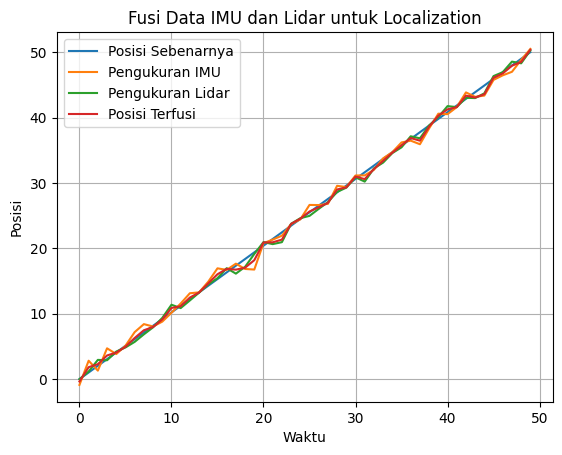

In [3]:
# Simulasi data sensor
true_positions = np.linspace(0, 50, 50)
imu_noise = np.random.normal(0, 1, 50)
lidar_noise = np.random.normal(0, 0.5, 50)

imu_measurements = true_positions + imu_noise
lidar_measurements = true_positions + lidar_noise

# Fusi data (rata-rata bobot sederhana)
weights_imu = 0.4
weights_lidar = 0.6
fused_positions = weights_imu * imu_measurements + weights_lidar * lidar_measurements

# Plot hasil fusi
plt.plot(true_positions, label="Posisi Sebenarnya")
plt.plot(imu_measurements, label="Pengukuran IMU")
plt.plot(lidar_measurements, label="Pengukuran Lidar")
plt.plot(fused_positions, label="Posisi Terfusi")
plt.legend()
plt.title("Fusi Data IMU dan Lidar untuk Localization")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.grid()
plt.show()


Analisis Hasil:

Pengukuran dari IMU dan Lidar digabungkan untuk mendapatkan estimasi posisi yang lebih akurat.

Lidar lebih stabil karena memiliki noise yang lebih kecil dibandingkan IMU.

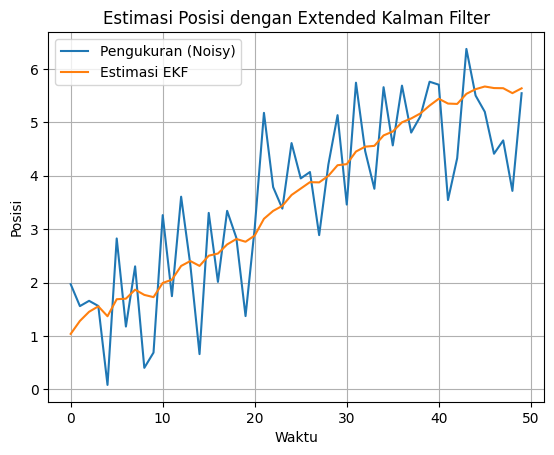

In [4]:
# Extended Kalman Filter (contoh sederhana)
# Model: x = [posisi, kecepatan]
# Update: posisi += kecepatan * dt
# Pengukuran: posisi (noisy)

# Parameter model
dt = 0.1
x = np.array([0, 1])  # [posisi, kecepatan]
P = np.eye(2)  # Kovariansi awal
Q = np.eye(2) * 0.01  # Noise proses
R = np.array([[1]])  # Noise pengukuran
H = np.array([[1, 0]])  # Matriks pengukuran

# Simulasi
positions = []
measurements = []

for i in range(50):
    # Prediksi
    x = np.array([x[0] + x[1] * dt, x[1]])
    P = P + Q

    # Simulasi pengukuran
    z = x[0] + np.random.normal(0, R[0, 0])
    measurements.append(z)

    # Update EKF
    y = z - H @ x
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x = x + K @ y
    P = (np.eye(2) - K @ H) @ P

    positions.append(x[0])

# Plot hasil EKF
plt.plot(measurements, label="Pengukuran (Noisy)")
plt.plot(positions, label="Estimasi EKF")
plt.legend()
plt.title("Estimasi Posisi dengan Extended Kalman Filter")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.grid()
plt.show()


Analisis Hasil:

EKF mampu mengakomodasi dinamika sistem yang lebih kompleks dibandingkan KF sederhana.

Estimasi posisi lebih baik meskipun terdapat noise pada pengukuran.


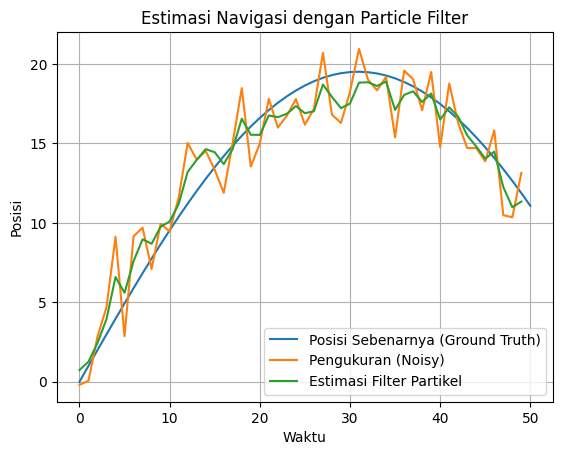

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter simulasi
num_particles = 1000  # Jumlah partikel
time_steps = 50  # Jumlah langkah waktu
dt = 1  # Time step (detik)
noise_motion = [1.0, 0.1]  # Noise gerak [posisi, orientasi]
noise_measurement = 2.0  # Noise pengukuran

# Simulasi gerakan sebenarnya (ground truth)
true_positions = [0]  # Posisi sebenarnya
true_orientations = [0]  # Orientasi sebenarnya (radian)

# Menginisialisasi posisi partikel
particles = np.zeros((num_particles, 2))  # [posisi, orientasi]
weights = np.ones(num_particles) / num_particles  # Bobot awal partikel

# Fungsi model gerak (menambah posisi berdasarkan kecepatan)
def motion_model(particle, velocity, steering_angle, dt):
    position, orientation = particle
    orientation += steering_angle + np.random.normal(0, noise_motion[1])
    position += velocity * np.cos(orientation) * dt + np.random.normal(0, noise_motion[0])
    return np.array([position, orientation])

# Fungsi likelihood berdasarkan pengukuran
def measurement_likelihood(particle, measurement):
    position = particle[0]
    return np.exp(-0.5 * ((position - measurement) ** 2) / (noise_measurement**2))

# Simulasi pengukuran noisy
measurements = []
for t in range(1, time_steps + 1):
    velocity = 1  # Kecepatan tetap
    steering_angle = 0.05  # Sudut kemudi tetap
    true_orientations.append(true_orientations[-1] + steering_angle)
    true_positions.append(true_positions[-1] + velocity * np.cos(true_orientations[-1]) * dt)
    measurement = true_positions[-1] + np.random.normal(0, noise_measurement)
    measurements.append(measurement)

# Particle Filter untuk navigasi
estimated_positions = []

for t in range(time_steps):
    velocity = 1
    steering_angle = 0.05

    # Perbarui partikel dengan model gerak
    for i in range(num_particles):
        particles[i] = motion_model(particles[i], velocity, steering_angle, dt)

    # Update bobot berdasarkan likelihood dari pengukuran
    for i in range(num_particles):
        weights[i] = measurement_likelihood(particles[i], measurements[t])
    weights += 1e-300  # Mencegah bobot nol
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling partikel berdasarkan bobot
    indices = np.random.choice(range(num_particles), num_particles, p=weights)
    particles = particles[indices]
    weights.fill(1.0 / num_particles)  # Reset bobot setelah resampling

    # Estimasi posisi rata-rata dari partikel
    mean_position = np.mean(particles[:, 0])
    estimated_positions.append(mean_position)

# Plot hasil simulasi
plt.plot(true_positions, label="Posisi Sebenarnya (Ground Truth)")
plt.plot(measurements, label="Pengukuran (Noisy)")
plt.plot(estimated_positions, label="Estimasi Filter Partikel")
plt.legend()
plt.title("Estimasi Navigasi dengan Particle Filter")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.grid()
plt.show()


Analisis Hasil:

Posisi Sebenarnya (Ground Truth): Merupakan lintasan yang dihasilkan dari model gerak sebenarnya.

Pengukuran (Noisy): Data pengukuran dengan noise yang disimulasikan.

Estimasi Filter Partikel: Partikel secara bertahap memperbaiki estimasi posisi dengan mempertimbangkan pengukuran dan model gerak.